In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
pip install keras


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.7 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.7 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 2.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 2.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.7 MB 2.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.7 MB 2.7 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.7 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 3.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.6

In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [22]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

In [10]:
data=pd.read_csv('C:\\Users\\sobitha\\Downloads\\Churn_Modelling.csv')

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# DATA CLEANING


In [16]:
data.dropna

<bound method DataFrame.dropna of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [24]:

X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']


X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 customer demographics

<Axes: xlabel='Exited', ylabel='count'>

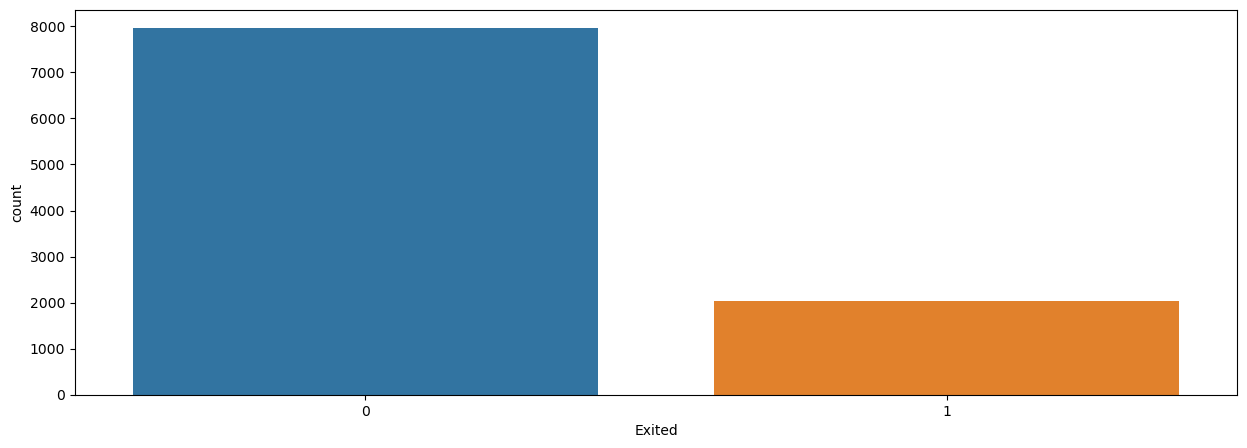

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data= data,x='Exited')

In [34]:
data.corr()

C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\1966003605.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

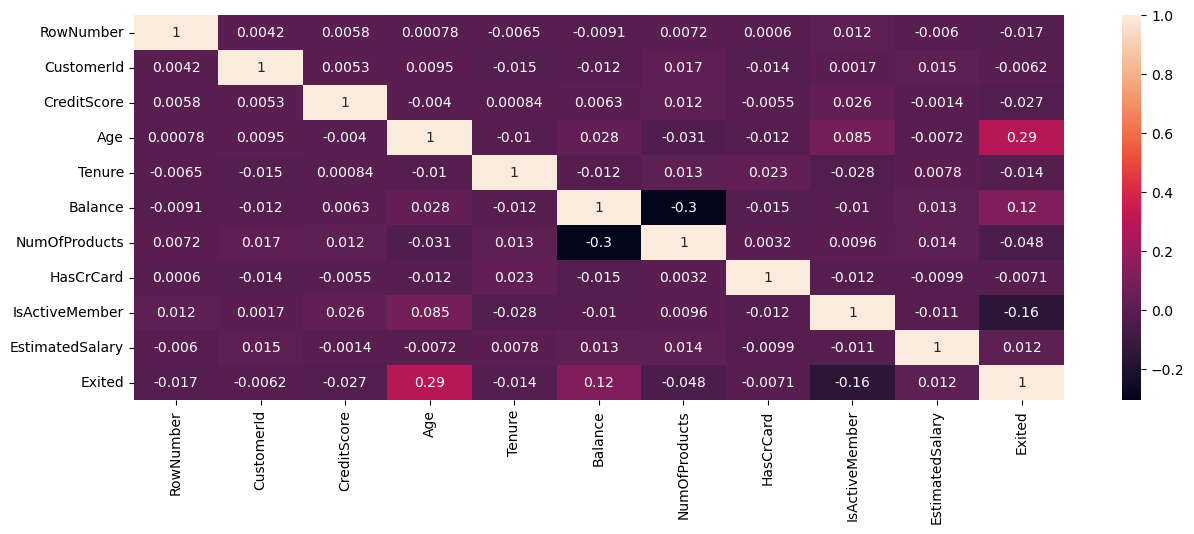

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

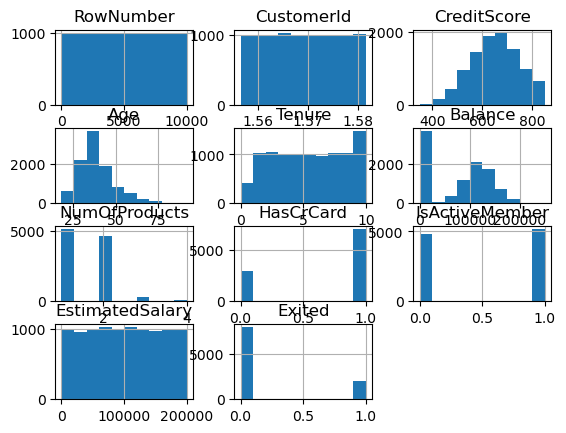

In [41]:
data.hist()


In [43]:
feature_importances = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 10
print(f"Top {top_n} Features:")
print(feature_importance_df.head(top_n))

Top 10 Features:
              Feature  Importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421


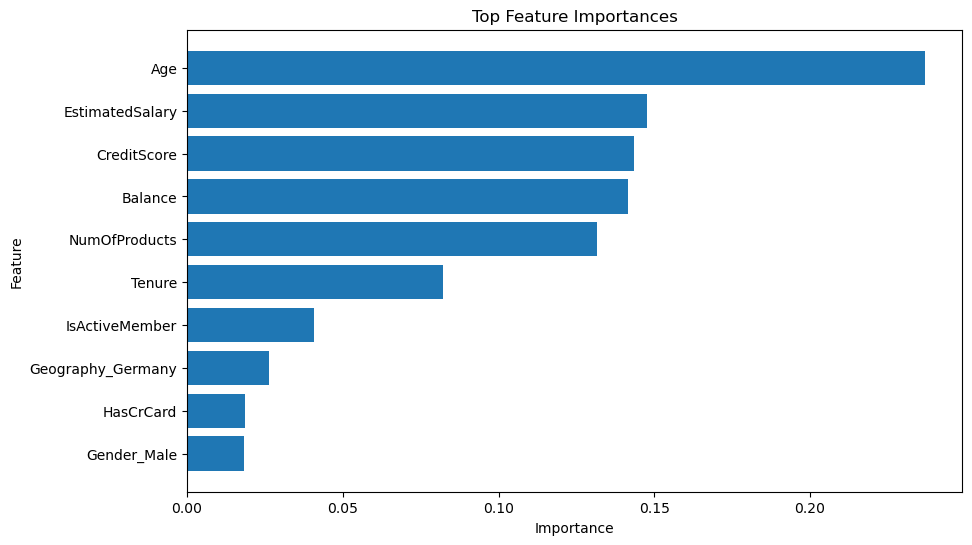

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

<Axes: xlabel='CreditScore', ylabel='Density'>

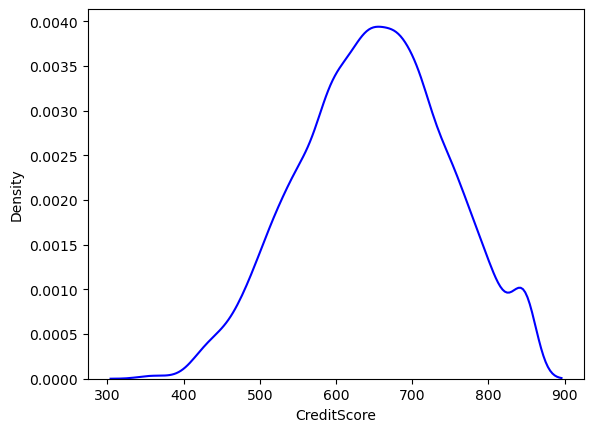

In [55]:
sns.kdeplot(data["CreditScore"],color='blue')

<Axes: xlabel='Balance', ylabel='Density'>

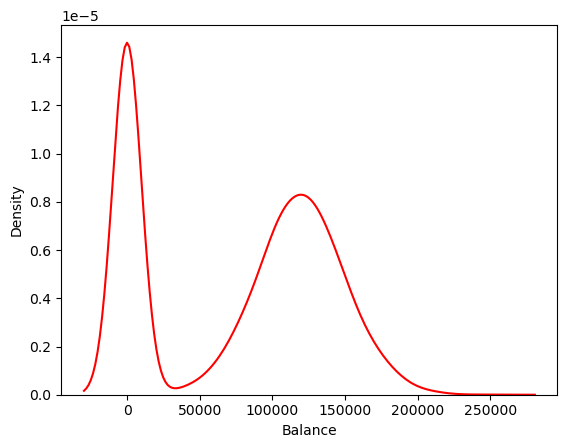

In [56]:
sns.kdeplot(data["Balance"],color='red')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

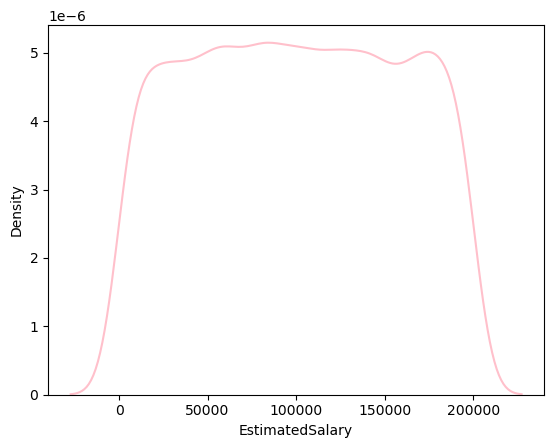

In [57]:
sns.kdeplot(data["EstimatedSalary"],color='pink')

<Axes: xlabel='Exited', ylabel='Density'>

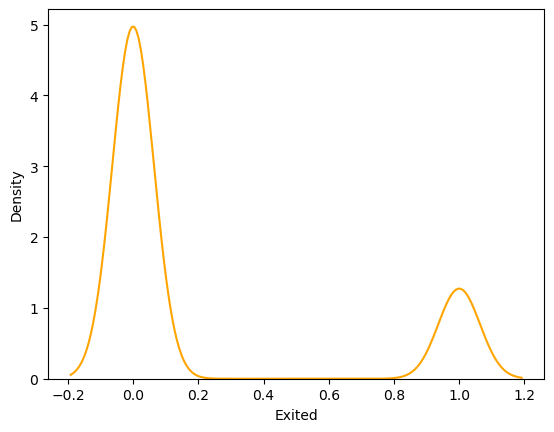

In [58]:
sns.kdeplot(data["Exited"],color='orange')

# outlier detection


In [59]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2847917962.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data.quantile(0.25)
C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2847917962.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data.quantile(0.75)
C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2847917962.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()


Age                 359
Balance               0
CreditScore          15
CustomerId            0
EstimatedSalary       0
Exited             2037
Gender                0
Geography             0
HasCrCard             0
IsActiveMember        0
NumOfProducts        60
RowNumber             0
Surname               0
Tenure                0
dtype: int64

In [60]:
for col in data.columns:
    if data[col].dtypes != 'object':
        q1 , q3 =data[col].quantile(0.25),data[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        data["CreditScore"] = np.where(data["CreditScore"]>ul,data["CreditScore"].mean(),np.where(data["CreditScore"]<ll,data["CreditScore"].mean(),data["CreditScore"]))  
        data["Age"] = np.where(data["Age"]>ul,data["Age"].mean(),np.where(data["Age"]<ll,data["Age"].mean(),data["Age"]))  
        data["NumOfProducts"] = np.where(data["NumOfProducts"]>ul,data["NumOfProducts"].mean(),np.where(data["NumOfProducts"]<ll,data["NumOfProducts"].mean(),data["NumOfProducts"]))

In [61]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2847917962.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data.quantile(0.25)
C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2847917962.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data.quantile(0.75)
C:\Users\sobitha\AppData\Local\Temp\ipykernel_14108\2847917962.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()


Age                   0
Balance               0
CreditScore           0
CustomerId            0
EstimatedSalary       0
Exited             2037
Gender                0
Geography             0
HasCrCard             0
IsActiveMember        0
NumOfProducts         0
RowNumber             0
Surname               0
Tenure                0
dtype: int64

data normalization


In [63]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
d=mms.fit_transform(X_train_scaled)
d

array([[0.672     , 0.18918919, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.564     , 0.32432432, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.418     , 0.08108108, 0.3       , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.77      , 0.27027027, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.634     , 0.33783784, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.694     , 0.44594595, 0.1       , ..., 1.        , 0.        ,
        1.        ]])

In [64]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = ann.fit(X_train_scaled, y_train,batch_size=20,epochs=50,validation_split=0.25)

Epoch 1/50
300/300 [==============================] - 3s 5ms/step - loss: 0.4788 - accuracy: 0.7977 - val_loss: 0.4239 - val_accuracy: 0.8220
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4205 - accuracy: 0.8238 - val_loss: 0.4081 - val_accuracy: 0.8345
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8363 - val_loss: 0.3908 - val_accuracy: 0.8435
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3781 - accuracy: 0.8450 - val_loss: 0.3780 - val_accuracy: 0.8460
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3600 - accuracy: 0.8547 - val_loss: 0.3669 - val_accuracy: 0.8500
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8603 - val_loss: 0.3624 - val_accuracy: 0.8500
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3432 - accuracy: 0.8622 - val_loss: 0.3593 - val_accuracy: 0.8505
Epoch 

In [69]:
y_pred = ann.predict(X_train_scaled)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(y_pred)

250/250 [==============================] - 1s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]


In [70]:
Pred=[]
for s in y_pred:
    if s==False:
        a=0
        Pred.append(a)
    else: 
        b=1
        Pred.append(b)
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [74]:

y_test_sample = y_test[:min(len(y_test), len(Pred))]
Pred_sample = Pred[:min(len(y_test), len(Pred))]


Prediction = pd.DataFrame({"Actual": y_test_sample, "Predicted": Pred_sample})

# Display predictions for the top few rows 
top_n_rows = 10
top_rows_prediction = Prediction.head(top_n_rows)
print(top_rows_prediction)


      Actual  Predicted
6252       0          0
4684       0          0
1731       0          0
4742       0          0
4521       0          1
6340       0          0
576        0          0
5202       1          0
6363       0          0
439        0          0


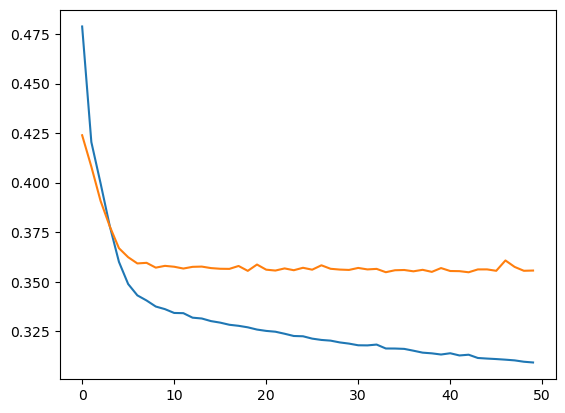

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

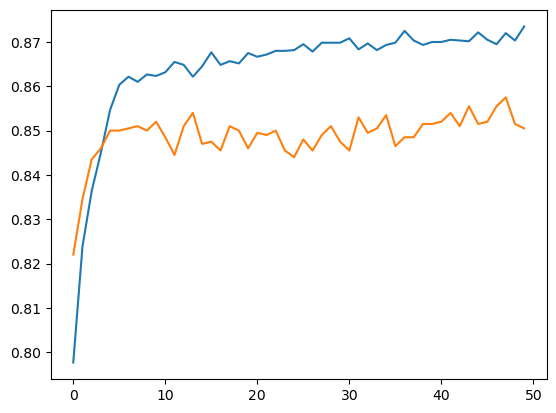

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# model 

random forest

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



logestic regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [82]:
lr.score(X_train_scaled, y_train)

0.811375